In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler
from hipe4ml.analysis_utils import train_test_generator
from hipe4ml import plot_utils

/usr/local/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/usr/local/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/usr/local/lib/python3.11/site-packages/shap/utils/_clustering.py:62: NumbaDeprecationWarning: The 'nopython' keyword argu

In [2]:
import sys
print(sys.version)

3.11.4 (main, Jun 20 2023, 16:51:49) [Clang 14.0.0 (clang-1400.0.29.202)]


In [3]:
import random
import ROOT
random_number = round(random.uniform(0, 10))
print(random_number)

Welcome to JupyROOT 6.28/04
1


In [4]:
dataH= TreeHandler('mergedAnalysisResults_final_combinedTPCTOF.root', 'treeMLLc_new')

In [5]:
dataH.write_df_to_root_files()

In [ ]:
dataH=TreeHandler()

In [ ]:
dataH.get_handler_from_large_file('mergedAnalysisResults_final_PID_geometry.root', 'treeMLLc_new')

In [ ]:
dataH= TreeHandler('newAnalysisResults_0_10.root', 'treeMLLc_new')

In [ ]:
dataH= TreeHandler('newAnalysisResults_10_60.root', 'treeMLLc_new')

In [ ]:
dataH2= TreeHandler('newAnalysisResults_60_100.root', 'treeMLLc_new')

In [5]:
promptH = TreeHandler('mergedAnalysisResults_MC_signal_all_var.root', 'treeMLLc_new').get_subset('pt_cand>1 and pt_cand<2')

In [ ]:
promptH1 = TreeHandler('mergedAnalysisResults_MC_signalbackground_all_var.root','treeMLLc_new').get_subset('pt_cand>1 and pt_cand<2')

In [6]:
bkgH = dataH.get_subset('(2.32 < inv_mass<2.45 or 2.1<inv_mass < 2.25)',size=promptH.get_n_cand()*3)
print(promptH.get_n_cand())
print(bkgH.get_n_cand())

88113
264339


In [7]:
train_test_data = train_test_generator([promptH, bkgH], [1,0], test_size=0.4, random_state=48)

In [8]:
# Get the names of all variables in the tree using TreeHandler's get_var_names method
vars_to_draw = bkgH.get_var_names()
#indices_to_keep = [1,2,3,4,5,6,7,8,9,14,15,16,17,18,26,27,28,29,30,38,39,40,41,42,50,51,52,53,54]
#indices_to_keep = [1,2,3,4,5,6,7,8,9,13,51,52,53]

#vars_to_draw = [var_names[i] for i in indices_to_keep]
print(vars_to_draw)

['inv_mass', 'pt_cand', 'd_len', 'd_len_xy', 'norm_dl_xy', 'cos_p', 'cos_p_xy', 'imp_par_xy', 'dca', 'sig_vert', 'max_norm_d0d0exp', 'imp_par_prong0', 'imp_par_prong1', 'imp_par_prong2', 'nsigComb_K_0', 'nsigComb_K_1', 'nsigComb_K_2', 'nsigComb_Pi_0', 'nsigComb_Pi_1', 'nsigComb_Pi_2', 'nsigComb_Pr_0', 'nsigComb_Pr_1', 'nsigComb_Pr_2']


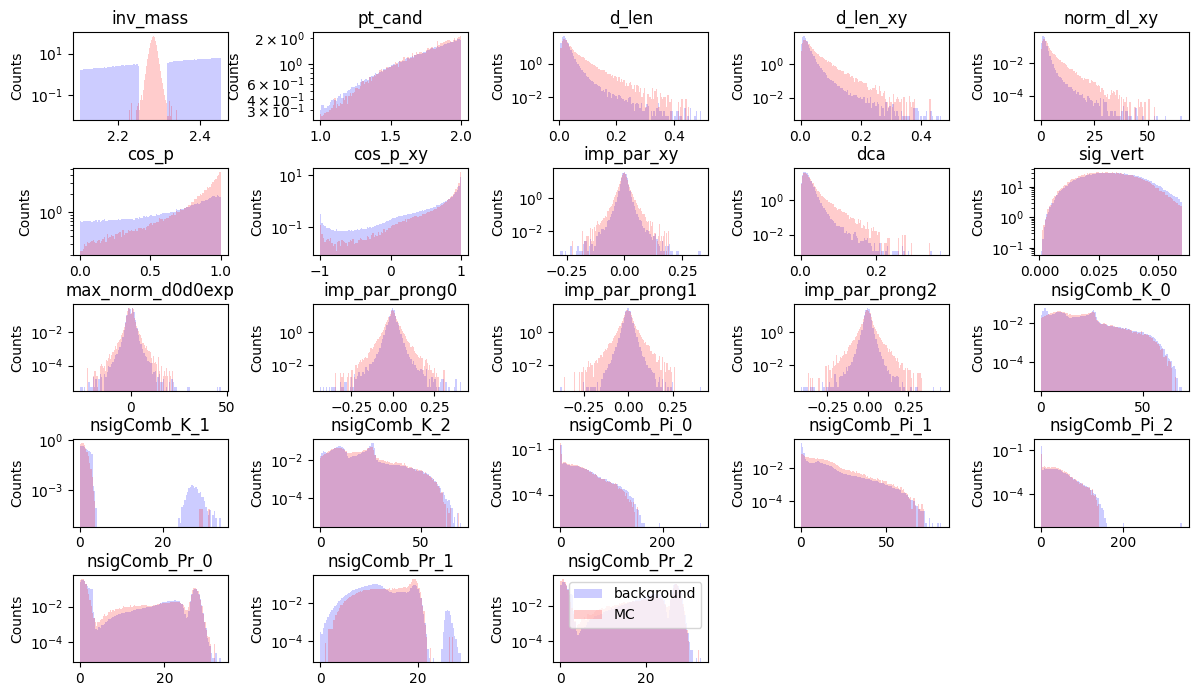

In [9]:

# Define labels and colors for the two datasets being plotted
leg_labels = ['background','MC']
colors = ['blue', 'red']


# Plot the distributions of the variables in vars_to_draw for the two datasets
# using plot_utils.plot_distr function
#plot_utils.plot_distr([bkgH, promptH, dataH, promptH2], vars_to_draw, bins=20, labels=leg_labels, colors=colors, log=True, density=True, figsize=(12, 7), alpha=0.3, grid=False)
plot_utils.plot_distr([bkgH,promptH], vars_to_draw, bins=100, labels=leg_labels, colors=colors, log=True, density=True, figsize=(12, 7), alpha=0.2, grid=False)
# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.55, wspace=0.55)

# Show the plot
plt.show()

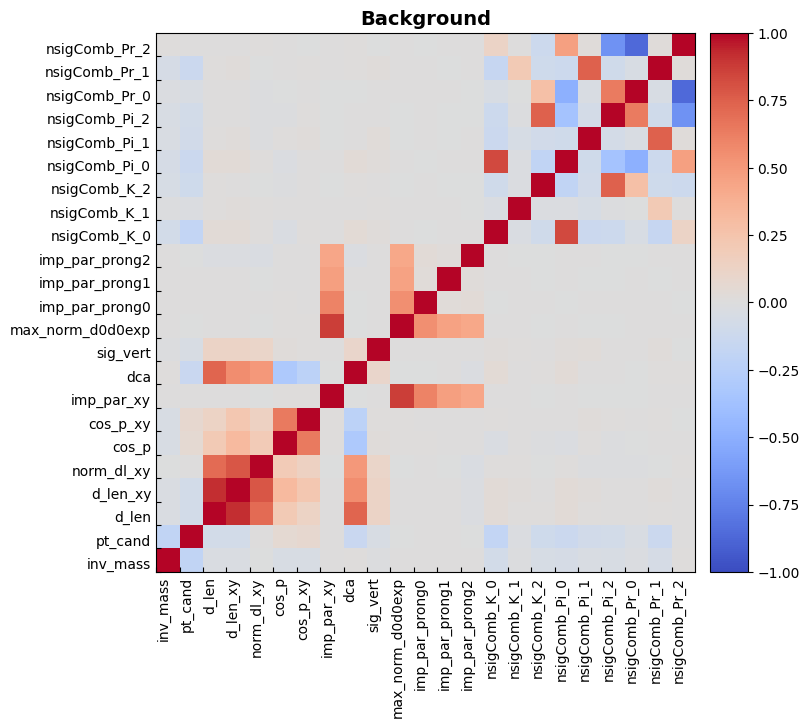

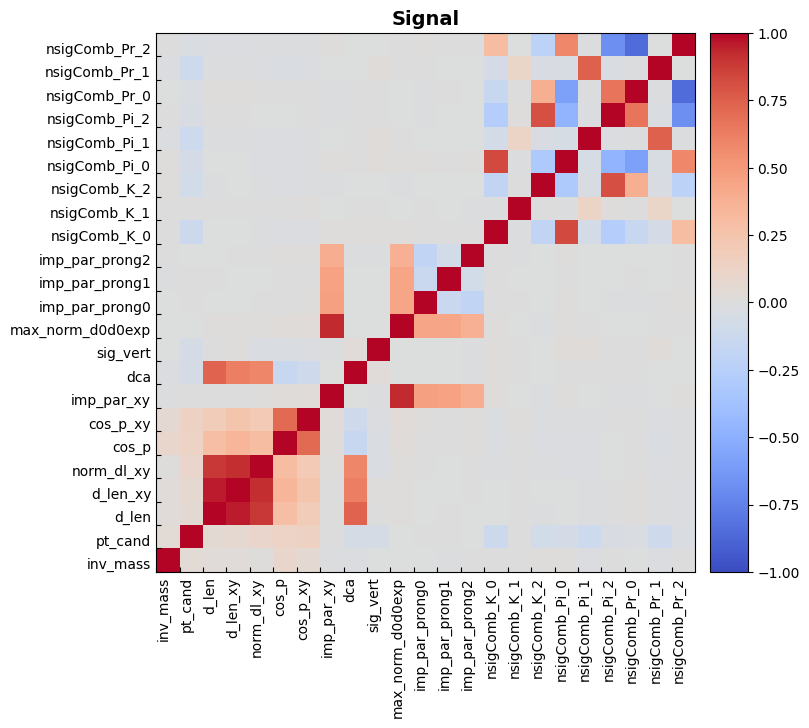

<Figure size 200x200 with 0 Axes>

In [10]:
plot_utils.plot_corr([bkgH, promptH], vars_to_draw, ["Background","Signal"])
fig = plt.figure(figsize=(2, 2))
plt.show()

In [11]:
features_for_train = vars_to_draw.copy()

features_for_train.remove('inv_mass')
features_for_train.remove('pt_cand')
# features_for_train.remove('nsigTOF_Pi_0')
# features_for_train.remove('nsigTOF_Pi_2')
# features_for_train.remove('nsigTOF_K_0')
# features_for_train.remove('nsigTOF_K_1')
# features_for_train.remove('nsigTOF_K_2') 
# features_for_train.remove('probBayes_Pr_1')
# features_for_train.remove('probBayes_Pi_2')
# features_for_train.remove('probBayes_K_2')
# features_for_train.remove('probBayes_Pr_2')
# features_for_train.remove('max_norm_d0d0exp')
# features_for_train.remove('dca')
# features_for_train.remove('imp_par_xy')

In [11]:
n_estimators=285 
max_depth=4
learning_rate=0.08563422612661689



In [12]:
model_clf = xgb.XGBClassifier()
#model_clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
model_hdl = ModelHandler(model_clf, features_for_train)

In [13]:
import time

In [14]:
start_time = time.time()
hyper_pars_ranges = {'n_estimators': (200, 500), 'max_depth': (
    2, 6), 'learning_rate': (0.01, 0.1)}
model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                 n_jobs=-1, n_trials=10, direction='maximize')

# Capture the end time
end_time = time.time()

# Calculate the total runtime in seconds
total_runtime = end_time - start_time

# Print the total runtime
print("Total runtime: {:.2f} seconds".format(total_runtime))

[I 2023-08-14 14:17:05,961] A new study created in memory with name: no-name-78cd5d91-0674-4145-a82f-c05b0374636f
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been d

Number of finished trials: 10
Best trial:
Value: 0.8778550170082691
Params: 
    n_estimators: 451
    max_depth: 6
    learning_rate: 0.0841437582744931
Total runtime: 1195.16 seconds


In [15]:
start_time = time.time()
model_hdl.train_test_model(train_test_data)
end_time = time.time()

# Calculate the total runtime in seconds
total_runtime = end_time - start_time

# Print the total runtime
print("Total runtime: {:.2f} seconds".format(total_runtime))

#with open('results.txt', 'a') as f:
  #  f.write("({}, {}, {}, {}, ".format(total_runtime, n_estimators, max_depth, learning_rate))

Training xgboost model for classification
Number of detected classes: 2
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.879430
Testing the model: Done!
Total runtime: 84.10 seconds


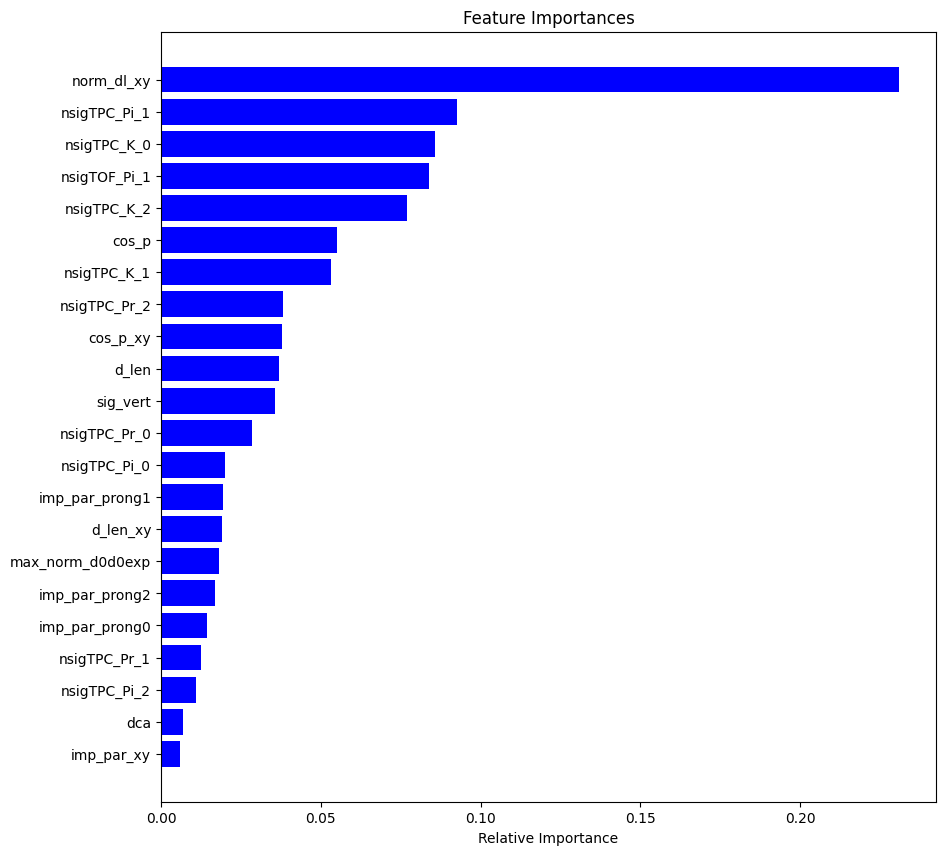

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Convert TreeHandler objects to pandas DataFrames
promptH_df = promptH.get_data_frame()
bkgH_df = bkgH.get_data_frame()

# Add target column
promptH_df['target'] = 1
bkgH_df['target'] = 0

# Combine the datasets
data = pd.concat([promptH_df, bkgH_df])

# Separate features and target
X = data[features_for_train]
y = data['target']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=44)


model = xgb.XGBRegressor(n_estimators=393, max_depth=4, learning_rate=0.08)


model.fit(X_train, y_train)


feature_importances = model.feature_importances_


indices = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_for_train[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

In [16]:
y_pred_train = model_hdl.predict(train_test_data[0], False)
y_pred_test = model_hdl.predict(train_test_data[2], False)

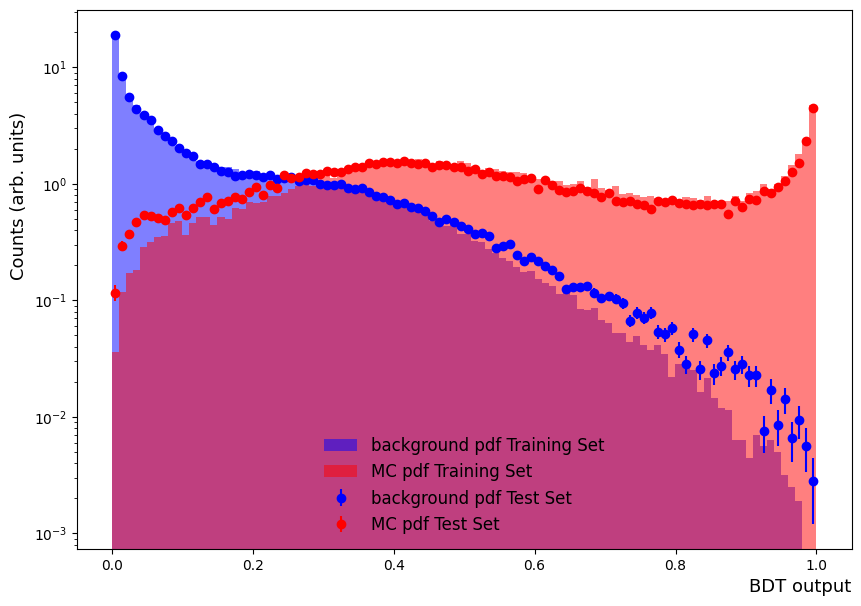

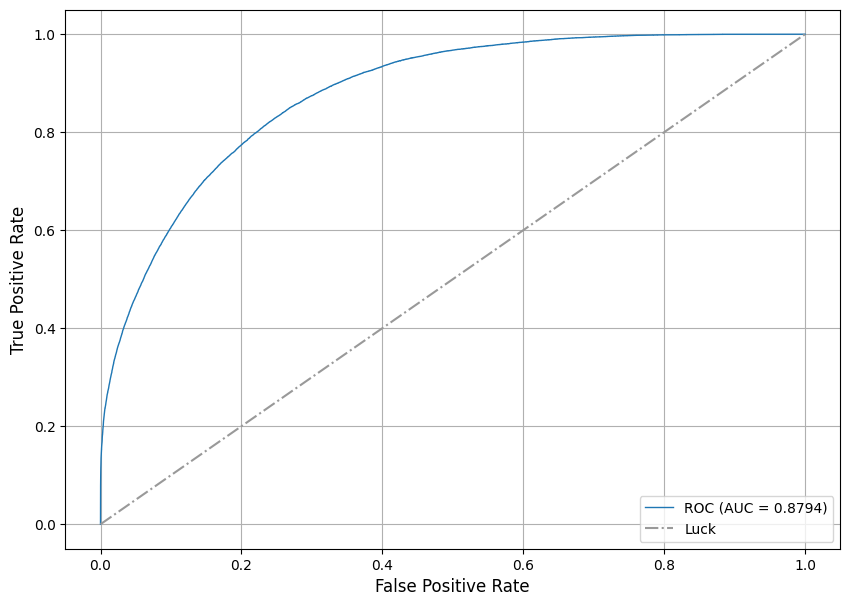

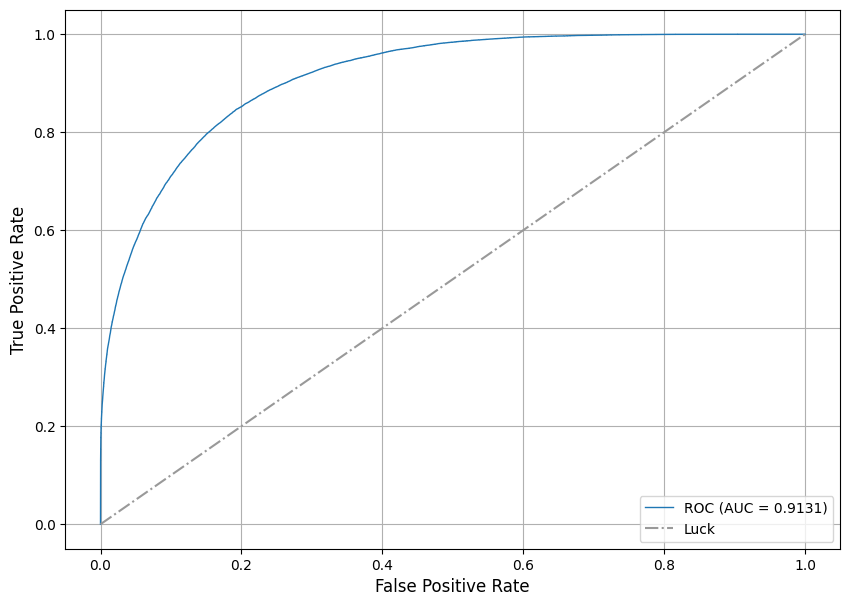

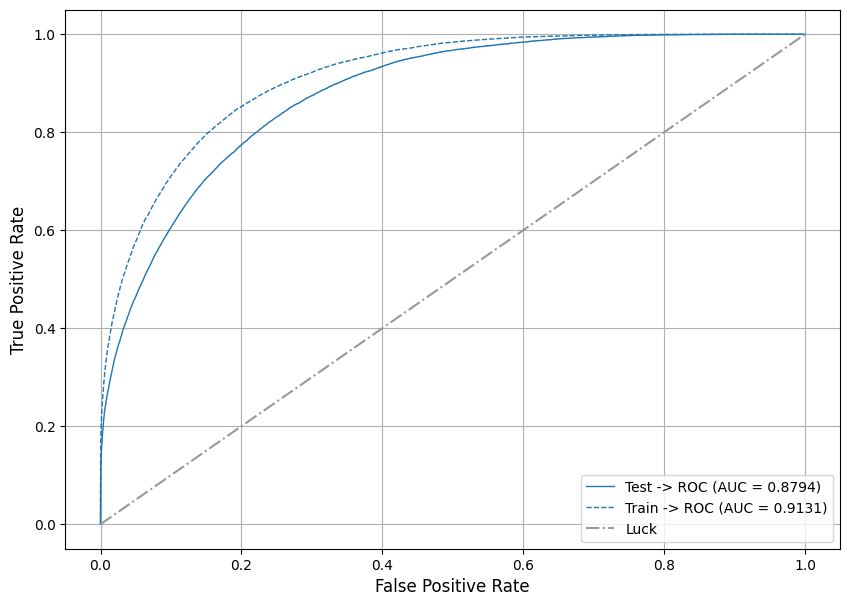

In [17]:
plt.rcParams["figure.figsize"] = (10, 7)

ml_out_fig = plot_utils.plot_output_train_test(model_hdl, train_test_data, 100, 
                                               False, leg_labels, True, density=True)

roc_train_test_fig = plot_utils.plot_roc_train_test(train_test_data[3], y_pred_test,
                                                    train_test_data[1], y_pred_train, None, leg_labels)
plt.show()

In [18]:
start_time = time.time()
dataH.apply_model_handler(model_hdl, False)
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime: {:.2f} seconds".format(total_runtime))

Total runtime: 248.08 seconds


In [16]:
promptH.write_df_to_parquet_files()

In [19]:
start_time = time.time()
promptH.apply_model_handler(model_hdl, False)

end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime: {:.2f} seconds".format(total_runtime))


Total runtime: 0.12 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the TreeHandler to a DataFrame
df_2 = promptH.get_data_frame()
start = 0.01
end = 0.99  # we use 0.82 to ensure 0.8 is included, as the stop value in np.arange() is exclusive
step = 0.01

BDTArray = np.arange(start, end, step)
data_frame_after = []
data_frame_ratio = []

for i in range(len(BDTArray)):
    data_df = df_2[df_2['model_output'] > BDTArray[i]]
    data_frame_after.append(data_df)

    # Calculate the ratio of the number of data frames after model output cuts
    ratio = len(data_df) / len(df_2)
    data_frame_ratio.append(ratio)

# Plot the ratio as a function of BDT cut values
plt.plot(BDTArray, data_frame_ratio, marker='o')

# Add labels and title to the plot
plt.xlabel('BDT Cut')
plt.ylabel('Ratio')
plt.title('Ratio as a function of BDT Cut')

# Display the plot
plt.show()


In [23]:

# Convert the TreeHandler to a DataFrame
df_2 = promptH.get_data_frame()[['inv_mass', 'model_output']]

# Select only 'inv_mass' and 'model_output'
#df_2 = data_df[['inv_mass', 'model_output']]


# Create a new TreeHandler with the filtered DataFrame
#filtered_dataH = TreeHandler(filtered_df, None)

start = 0.5
end = 0.99 # we use 0.82 to ensure 0.8 is included, as the stop value in np.arange() is exclusive
step = 0.01

BDTArray = np.arange(start, end, step)


data_frame_after = [] 

for i in range(len(BDTArray)):
    data_df = df_2[df_2['model_output'] > BDTArray[i]]
    data_frame_after.append(data_df)
 


In [24]:
BDTArray_np = np.array(BDTArray)
BDTArray_int = (BDTArray_np * 100).astype(int)
print(len(BDTArray_int),len(BDTArray),len(data_frame_after))

49 49 49


In [29]:
#n_entries_original = dataH.get_n_cand()


BDTArray = [0.3]

selected_data_hndl_array = [] # Initialize an empty list
data_frame_after = []
for i in range(len(BDTArray)):
    selected_data_hndl = dataH.get_subset(f'model_output > {BDTArray[i]}')
    selected_data_hndl_array.append(selected_data_hndl) # Add the selected data to the list
 
for i in range(len(selected_data_hndl_array)):
    data_frame_after.append(selected_data_hndl_array[i]._full_data_frame)
    print(i)


0


In [25]:
import ROOT
import pandas as pd

hist_array = []  # Initialize an empty list for histograms
# Create a canvas to hold the histograms
#canvas = ROOT.TCanvas("canvas", "Histograms", 800, 600)
#canvas.Divide(10, 10)  # Divide the canvas into a grid
file = ROOT.TFile("output_Final_Signal_TPCTOFcombined.root", "RECREATE")

# Create a ROOT histogram for data_frame_before
#hist = ROOT.TH1F("inv_mass_MB", "Histogram of inv_mass;inv_mass;Frequency", 100, data_frame_before['inv_mass'].min(), data_frame_before['inv_mass'].max())

# Fill the histogram with DataFrame column values
#for value in data_frame_before['inv_mass']:
   # hist.Fill(value)

# Loop over each dataframe in data_frame_after
for j in range(len(data_frame_after)):
    print(j)
    # Create a ROOT histogram for the current dataframe
    
    hist1 = ROOT.TH1F(f"inv_mass_{BDTArray_int[j]}", "Histogram of inv_mass;inv_mass;Frequency", 50, data_frame_after[j]['inv_mass'].min(), data_frame_after[j]['inv_mass'].max())
   
    
    # Fill the histogram with DataFrame column values
    for value in data_frame_after[j]['inv_mass']:
        hist1.Fill(value)
    
    # Add the histogram to the list
    hist_array.append(hist1)
    hist1.Write()

        

# Close the ROOT file
file.Close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [31]:
# import ROOT
# import numpy as np
# import matplotlib.pyplot as plt

# hist_array = []  # Initialize an empty list for histograms
# file = ROOT.TFile("output_Final_geometry_neyshabor.root", "READ")

# # Define the dimensions of the grid
# m = 10  # Number of rows
# n = 10 # Number of columns

# # Create a Matplotlib figure and axis for the subplots
# fig, axs = plt.subplots(m, n, figsize=(20, 20))

# # Loop over each dataframe in data_frame_after
# for j in range(len(data_frame_after)):
#     hist_name = f"inv_mass_{BDTArray_int[j]}"
#     hist = file.Get(hist_name)  # Get the histogram from the ROOT file

#     # Convert the ROOT histogram to a NumPy array
#     n_bins = hist.GetNbinsX()
#     x = np.zeros(n_bins)
#     y = np.zeros(n_bins)
#     for i in range(n_bins):
#         x[i] = hist.GetBinCenter(i + 1)
#         y[i] = hist.GetBinContent(i + 1)

#     # Determine the subplot index
#     row = j // n
#     col = j % n

#     # Plot the histogram in the corresponding subplot
#     axs[row, col].bar(x, y, align='edge', width=hist.GetBinWidth(1))

#     # Add labels and title to the subplot
#     axs[row, col].set_xlabel('', fontsize=4)
#     axs[row, col].set_ylabel('Frequency', fontsize=4)
#     axs[row, col].set_title(f'BDT > {BDTArray_int[j]}', fontsize=10)

#     # Adjust the width of the bars
#     axs[row, col].bar(x, y, align='edge', width=0.9 * hist.GetBinWidth(1))
#     axs[row, col].tick_params(axis='x', labelsize=4)
#     axs[row, col].tick_params(axis='y', labelsize=4)
# # Manually adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.6, hspace=0.9)

# # Display the plot
# plt.show()

# # Close the ROOT file
# file.Close()